In [ ]:
import jax
import jax.numpy as np
import math
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt

In [ ]:
# Creating a key for reproducibility
key = jax.random.PRNGKey(1)

<https://www.tensorflow.org/datasets/api_docs/python/tfds/load>

In [ ]:
# Import data
# 1150 files
import tensorflow_datasets as tfds

# tfds works in both Eager and Graph modes
# tf.enable_eager_execution()

# Load the full GMD with MIDI only (no audio) as a tf.data.Dataset
dataset = tfds.load(
    name="groove/full-midionly",
    split=tfds.Split.TRAIN,
    try_gcs=True)

In [ ]:
# Build your input pipeline
dataset = dataset.shuffle(1024).batch(32).prefetch(
    tf.data.experimental.AUTOTUNE)
for features in dataset.take(1):
  # Access the features you are interested in
  midi, genre = features["midi"], features["style"]["primary"]

In [ ]:
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train')

In [6]:
import numpy as np
# import tensorflow as tf
from pathlib import Path
from mido import MidiFile
import mido

seed = 42
# tf.random.set_seed(seed)
np.random.seed(seed)

class DataPoint:
    def __init__(self,
                 midi_data,
                 features,
                 audio_file_path,
                 midi_file_path,
                 purpose) -> None:
        self.midi_data = midi_data
        self.features = features
        self.audio_file_path = audio_file_path
        self.midi_file_path = midi_file_path
        self.purpose = purpose




feature_names = ["style", "bpm", "beat_type", "time_signature", "duration"]
feature_to_column_idx = {
    "session" : 0,
    "drummer" : 1,
    "id" : 2,
    "style" : 3,
    "bpm" : 4,
    "beat_type" : 5,
    "time_signature" : 6,
    "midi_filename" : 7,
    "audio_filename" : 8,
    "duration" : 9,
    "split" : 10
}

def play_audio(midi_data: MidiFile, duration: float=None) -> None:
        
    # Create output port for playing samples
    with mido.open_output(autoreset=True) as outport: 
        if isinstance(duration, (float, int)):
            for msg in midi_data.play():
                if duration <= 0: break
                outport.send(msg)
                duration -= msg.time
        else:
            for msg in midi_data.play():
                outport.send(msg)

    if not outport.closed:
        print("Closing port...")
        outport.close()

def get_tempo(mid):
    for track in mid.tracks:
        for msg in track:
            if msg.type == 'set_tempo':
                return msg.tempo
    return False  # Default tempo if not found


## Read Data

In [7]:



# Initiate data structures
X_train = []
X_test = []
X_validation = []
# X_train = [0] * 897
# X_test = [0] * 129
# X_validation = [0] * 124
# y_train = np.zeros(())
# y_test = np.zeros(())

# Define filename and its path
data_filename = "info.csv"
data_folder_path = Path().cwd() / "data"
data_path = data_folder_path / data_filename

# bpm_stats = {}

# Open file with data information
with data_path.open() as file:
    columns = file.readline()
    train_idx = 0
    test_idx = 0
    validation_idx = 0
    for i, line in enumerate(file):
        # Strip line of new line and split into list
        line = line.strip().split(",")

        bpm = line[4]
        time_signature = line[6]
        # if bpm in bpm_stats.keys():
        #     bpm_stats[bpm] += 1
        # else:
        #     bpm_stats[bpm] = 1
        if bpm != "120" or time_signature != "4-4":
            continue

        # Check
        # print(line)

        # Attach absolute path to midi & audio files
        midi_data_path = data_folder_path / line[7]
        audio_data_path = data_folder_path / line[8]

        # Create custom data point with all info
        midi_data = MidiFile(midi_data_path)


        features = {i: line[feature_to_column_idx[i]] for i in feature_names}
        data_point = DataPoint(
            midi_data=midi_data,
            audio_file_path=audio_data_path,
            midi_file_path=midi_data_path,
            features=features,
            purpose=line[feature_to_column_idx["split"]]
        )

        # Play the sample
        # play_audio(midi_data, 3)

        if data_point.purpose == "train":
            # X_train[train_idx] = data_point
            # train_idx += 1
            X_train.append(data_point)
        elif data_point.purpose == "test":
            # X_test[test_idx] = data_point
            # test_idx += 1
            X_test.append(data_point)
        elif data_point.purpose == "validation":
            # X_validation[validation_idx] = data_point
            # validation_idx += 1
            X_validation.append(data_point)

        print(len(X_train), len(X_test), len(X_validation))

        # print(line.strip().split(","))
        # print("Next sample\n")
        # if i == 10: print("Breaking"); break

print(len(X_train))
print(len(X_test))
print(len(X_validation))

1 0 0
1 0 1
1 0 2
1 0 3
2 0 3
3 0 3
4 0 3
5 0 3
5 0 4
5 0 5
6 0 5
7 0 5
8 0 5
9 0 5
10 0 5
11 0 5
12 0 5
13 0 5
14 0 5
14 1 5
15 1 5
16 1 5
17 1 5
17 2 5
18 2 5
19 2 5
19 3 5
19 3 6
20 3 6
21 3 6
22 3 6
23 3 6
24 3 6
25 3 6
26 3 6
27 3 6
28 3 6
29 3 6
29 4 6
30 4 6
31 4 6
32 4 6
33 4 6
34 4 6
34 5 6
35 5 6
36 5 6
37 5 6
38 5 6
38 5 7
39 5 7
39 5 8
40 5 8
40 5 9
41 5 9
41 6 9
42 6 9
43 6 9
44 6 9
45 6 9
46 6 9
47 6 9
48 6 9
49 6 9
50 6 9
51 6 9
51 7 9
52 7 9
53 7 9
54 7 9
55 7 9
56 7 9
57 7 9
58 7 9
59 7 9
60 7 9
61 7 9
62 7 9
63 7 9
64 7 9
65 7 9
66 7 9
67 7 9
68 7 9
69 7 9
69
7
9


In [4]:
bpm_stats

{'138': 8,
 '102': 11,
 '105': 48,
 '86': 12,
 '80': 12,
 '84': 24,
 '87': 5,
 '65': 4,
 '116': 43,
 '94': 6,
 '120': 86,
 '95': 82,
 '125': 48,
 '78': 24,
 '64': 1,
 '140': 51,
 '130': 46,
 '93': 42,
 '180': 3,
 '290': 1,
 '90': 17,
 '170': 2,
 '157': 1,
 '114': 24,
 '92': 43,
 '190': 1,
 '110': 35,
 '122': 31,
 '50': 1,
 '115': 20,
 '118': 17,
 '128': 32,
 '200': 2,
 '144': 28,
 '88': 4,
 '176': 1,
 '96': 22,
 '117': 4,
 '108': 6,
 '185': 1,
 '182': 1,
 '135': 11,
 '124': 4,
 '215': 7,
 '100': 70,
 '158': 2,
 '152': 1,
 '184': 1,
 '134': 2,
 '112': 35,
 '127': 3,
 '136': 1,
 '72': 1,
 '126': 4,
 '89': 3,
 '162': 1,
 '101': 3,
 '133': 1,
 '141': 1,
 '99': 1,
 '104': 9,
 '70': 19,
 '60': 11,
 '142': 6,
 '132': 4,
 '75': 19,
 '148': 10,
 '145': 8,
 '83': 13,
 '98': 11,
 '67': 15,
 '63': 8,
 '82': 2,
 '81': 2,
 '103': 2,
 '85': 3,
 '137': 2,
 '106': 2,
 '91': 2}

In [3]:
print(len(X_train) - X_train.count(0))
print(len(X_test) - X_test.count(0))
print(len(X_validation) - X_validation.count(0))

38
3
7


X_train = 897
X_test = 129
X_validation = 124

In [ ]:
validation_idx

In [ ]:
# print(X_train, X_test, X_validation, sep="\n")
# print(X_test[0])

for i in X_train[:1]:
    print(i.purpose, i.features, i.midi_file_path, i.audio_file_path, sep="\n")

In [ ]:
sample = X_train[0].midi_data
for i, track in enumerate(sample.tracks):
    print('Track {}: {}'.format(i, track.name))
    for msg in track:
        print(msg)

In [ ]:
count = 0
print(len(X_validation))
for x in X_validation:
    count += 1 if x.midi_data.type == 0 else 0

print(count)

In [ ]:
sample = X_train[0].midi_data
track = sample.tracks[0]

temp_msg = mido.MetaMessage('set_tempo', tempo=mido.bpm2tempo(120), time=0)

for i in sample.tracks:
    for j, msg in enumerate(i):
        if msg.type == "set_tempo":
            i[j] = mido.MetaMessage('set_tempo', tempo=mido.bpm2tempo(120), time=0)
        # msg.copy(tempo=100000)
        # print(dir(msg))
        # if j == 0: break
sample.save("test")

play_audio(mido.MidiFile("test"), 5)
# track.append(temp_msg)
# play_audio(sample, 5)

In [17]:
# import infmidi

sample = X_train[0].midi_data
new_sample = MidiFile()
new_track = mido.MidiTrack()
new_track.ticks_per_beat = sample.ticks_per_beat
new_sample.tracks.append(new_track)
# play_audio(sample, 5)
# duration = 0
tempo = get_tempo(sample)
y = []
x = []
t = 0
t_f = 0
y_f = []
x_f = []
for track in sample.tracks:
    for msg in track:
        if t >= 10:
            break
        # print(msg)

        # if duration >= mido.second2tick(5, tempo=tempo, ticks_per_beat=sample.ticks_per_beat):
        #     break
        # duration += msg.time
        if msg.type in ("note_on"):
            y.append(msg.note)
            new_t = t + mido.tick2second(msg.time, ticks_per_beat=sample.ticks_per_beat, tempo=tempo)
            x.append(new_t)
            t = new_t
        else:
            t += mido.tick2second(msg.time, ticks_per_beat=sample.ticks_per_beat, tempo=tempo)

        # new_msg = msg
        if not msg.is_meta:
            # if msg.is_cc():
            #     continue
            if msg.type == "note_on":
                if msg.note == 38:
                    new_msg = mido.Message("note_on", 
                                           channel=9,
                                           note=38,
                                           velocity=64,
                                           time=msg.time)
                    new_track.append(new_msg)
                    # pass
                else:
                    new_msg = mido.Message("note_off", 
                                           channel=9,
                                           note=38,
                                           velocity=0,
                                           time=msg.time)
                    new_track.append(new_msg)
            else:
                new_track.append(msg)
        else:
            new_track.append(msg)

        # if new_msg.type in ("note_on"):
        #     y_f.append(new_msg.note)
        #     new_t = t_f + mido.tick2second(new_msg.time, ticks_per_beat=sample.ticks_per_beat, tempo=tempo)
        #     x_f.append(new_t)
        #     t_f = new_t
        # else:
        #     t_f += mido.tick2second(new_msg.time, ticks_per_beat=sample.ticks_per_beat, tempo=tempo)
            
            
                    
print("After filter...")
# play_audio(new_sample, 5)

After filter...


In [4]:
X_train[0].midi_file_path

WindowsPath('c:/Users/mrmar/Downloads/Neural Networks/Project/NN_Drummer_Beat_Project/data/drummer1/session1/101_dance-disco_120_beat_4-4.mid')

In [11]:
sample.length

309.33125000000126

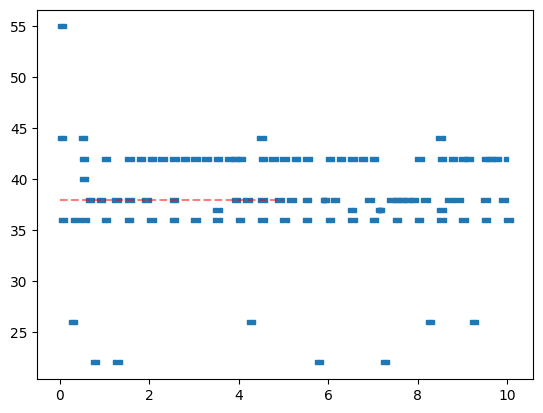

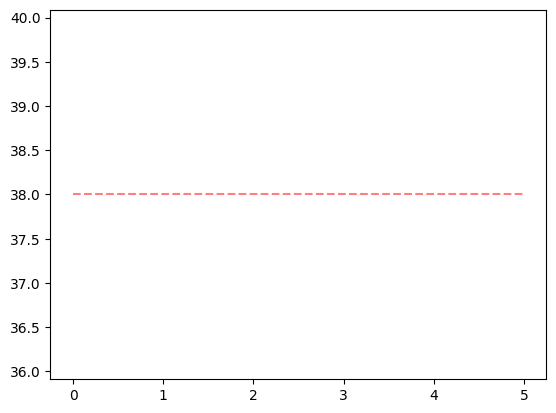

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x, y, s=5, marker="s")
plt.hlines(38, 0, 5, ls="--", color="red", alpha=0.5)
plt.show()
plt.scatter(x_f, y_f, s=5, marker="s")
plt.hlines(38, 0, 5, ls="--", color="red", alpha=0.5)
# hist, bins = np.histogram(y, bins)
# plt.stairs(hist, bins)
plt.show()

# play_audio(sample, 5)
play_audio(new_sample, 5)

In [19]:
for track in new_sample.tracks:
    for msg in track:
        if msg.type == "note_on":
            print(msg)

note_on channel=9 note=38 velocity=64 time=16
note_on channel=9 note=38 velocity=64 time=23
note_on channel=9 note=38 velocity=64 time=33
note_on channel=9 note=38 velocity=64 time=97
note_on channel=9 note=38 velocity=64 time=113
note_on channel=9 note=38 velocity=64 time=82
note_on channel=9 note=38 velocity=64 time=2
note_on channel=9 note=38 velocity=64 time=1
note_on channel=9 note=38 velocity=64 time=22
note_on channel=9 note=38 velocity=64 time=96
note_on channel=9 note=38 velocity=64 time=148
note_on channel=9 note=38 velocity=64 time=86
note_on channel=9 note=38 velocity=64 time=10
note_on channel=9 note=38 velocity=64 time=2
note_on channel=9 note=38 velocity=64 time=13
note_on channel=9 note=38 velocity=64 time=16
note_on channel=9 note=38 velocity=64 time=3
note_on channel=9 note=38 velocity=64 time=3
note_on channel=9 note=38 velocity=64 time=11
note_on channel=9 note=38 velocity=64 time=97
note_on channel=9 note=38 velocity=64 time=47
note_on channel=9 note=38 velocity=64

In [6]:
test_audio = MidiFile()
test_track = mido.MidiTrack()
test_audio.tracks.append(test_track)
# for i in range(30):
test_track.append(mido.Message("note_on", time=1000, note=38, channel=9))
print(test_audio.tracks)
test_audio.save("test.mid")
play_audio(MidiFile("test.mid"))

[MidiTrack([note_on channel=9 note=38 velocity=64 time=1000])]


In [5]:
import jax.numpy as jnp

# arange
# linspace
# :list
# ones
# zeros
# identity

test = jnp.identity(2, jnp.int16)
print(test)

seed = 42
key = jax.random.PRNGKey(seed)
print(key)
jax.random.uniform(key)
key, subkey = jax.random.split(key)
print(key, subkey)

[[1 0]
 [0 1]]
[ 0 42]
[2465931498 3679230171] [255383827 267815257]
